In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import pmdarima as pm

# Import data and plot time series, acf, pcf

In [2]:
df = pd.read_excel("G1.xlsx")

In [3]:
Model_Time = np.arange(1, 100).reshape(99, 1)

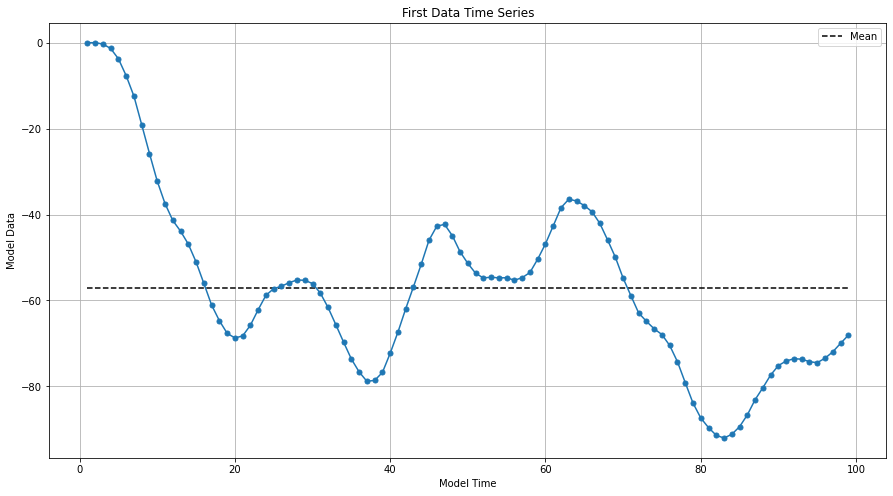

In [4]:
array_data = np.array(df[0])

fig, ax = plt.subplots(figsize=(15,8))

y = df
x = Model_Time

mean_data = [np.mean(array_data)] * len(array_data)
mean_line = ax.plot(x, mean_data, label='Mean', linestyle='--', color = "k")
legend = ax.legend(loc='upper right')


plt.plot(x, y, marker = "o", markersize = 5)
plt.xlabel("Model Time")
plt.ylabel("Model Data")
plt.grid()
plt.title("First Data Time Series")

plt.savefig("First Data Time Series.jpg", dpi = 150)
plt.show()

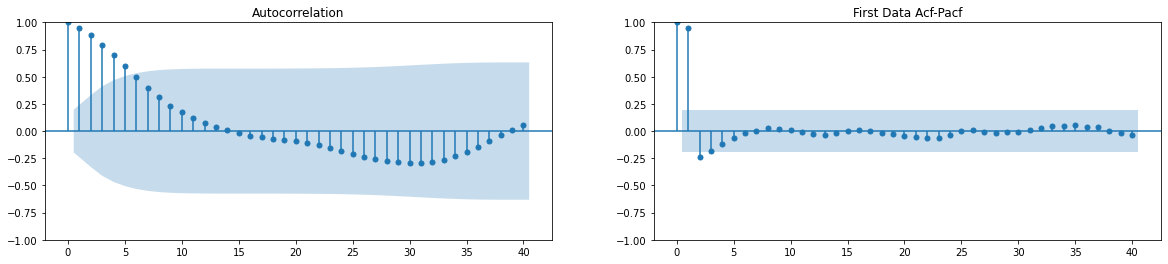

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2,figsize=(20,4))

plot_acf(df, alpha = 0.05, lags = 40, ax=ax[0])
plot_pacf(df, alpha = 0.05, lags = 40, ax=ax[1], method='ywm')
plt.title("First Data Acf-Pacf")

plt.savefig("First Data Acf-Pacf.jpg", dpi = 150)
plt.show()

In [6]:
array_data_diff_1_f = np.diff(array_data)
array_data_diff_1 = array_data_diff_1_f.reshape(98, 1)

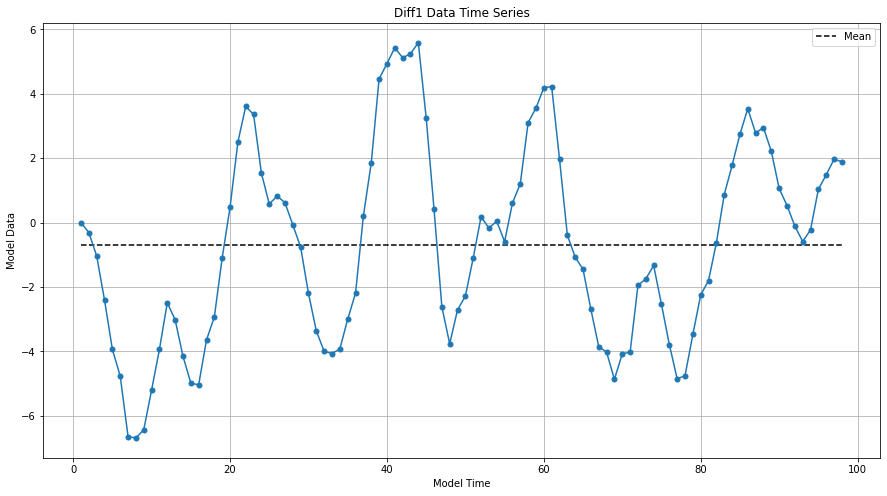

In [7]:
fig, ax = plt.subplots(figsize=(15,8))

array_Time_diff_1 = np.arange(1, 99).reshape(98, 1)
y = array_data_diff_1
x = array_Time_diff_1

mean_data_diff_1 = [np.mean(array_data_diff_1)] * len(array_data_diff_1)
mean_line = ax.plot(x, mean_data_diff_1, label='Mean', linestyle='--', color = "k")
legend = ax.legend(loc='upper right')

plt.plot(x, y, marker = "o", markersize = 5)
plt.xlabel("Model Time")
plt.ylabel("Model Data")
plt.grid()
plt.title("Diff1 Data Time Series")

plt.savefig("Diff1 Data Time Series.jpg", dpi = 150)
plt.show()

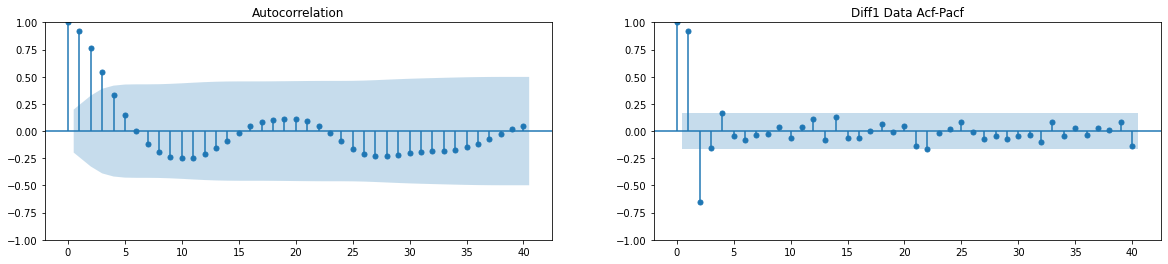

In [8]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

plot_acf(array_data_diff_1, alpha = 0.05, lags = 40, ax=ax[0])
plot_pacf(array_data_diff_1, alpha = 0.1, lags = 40, ax=ax[1], method='ywm')
plt.title("Diff1 Data Acf-Pacf")

plt.savefig("Diff1 Data Acf-Pacf.jpg", dpi = 150)
plt.show()

# fit model

In [9]:
ARIMA_1 = pm.auto_arima(array_data, start_p = 0, start_q = 0,
                          max_p = 2, max_q = 2, m = 1, d = 1,
                          seasonal = False, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

ARIMA_1.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=500.923, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=311.245, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=400.800, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=503.872, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=252.907, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=253.542, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=281.128, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=251.727, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=309.320, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=252.566, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=279.280, Time=0.04 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 0.575 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -122.863
Date:                Wed, 29 Dec 2021   AIC                            251.727
Time:                        07:08:40   BIC                            259.482
Sample:                             0   HQIC                           254.863
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5518      0.078     19.971      0.000       1.399       1.704
ar.L2         -0.6684      0.077     -8.702      0.000      -0.819      -0.518
sigma2         0.6956      0.110      6.295      0.000       0.479       0.912
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.39   Prob(JB):                         0.74
Heteroskedasticity (H):               1.00   Skew:                            -0.01
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# residuals be white noise and  normal

In [10]:
residual = ARIMA_1.resid()
residual_Time = np.arange(1, 100)

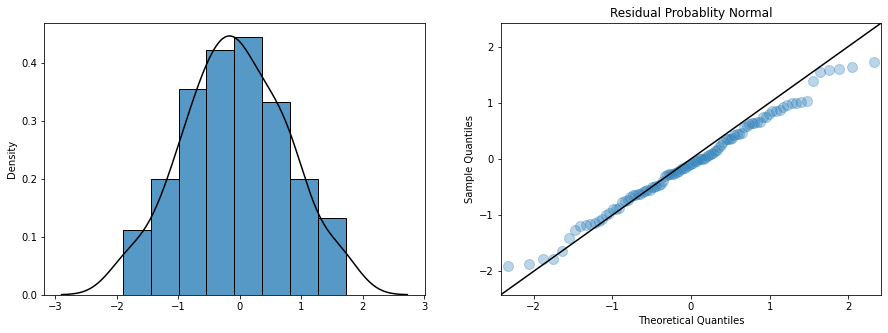

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
qq = sm.graphics.gofplots.ProbPlot(residual).qqplot(marker='o', markersize=10, alpha=0.3, ax=ax[1])
sm.api.qqline(qq.axes[1], line='45', fmt='k--');

sns.histplot(residual,stat='density',ax=ax[0])
sns.kdeplot(residual,color='k',ax=ax[0])

plt.title("Residual Probablity Normal")

plt.savefig("Residual Probablity Normal.jpg", dpi = 150)

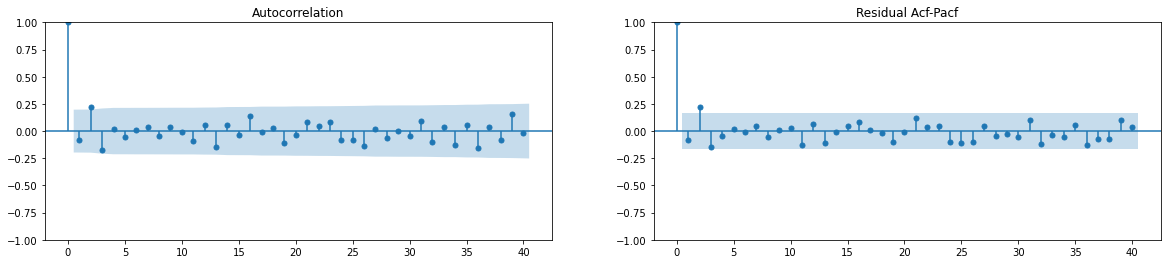

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

plot_acf(residual, alpha = 0.05, lags = 40, ax=ax[0])
plot_pacf(residual, alpha = 0.1, lags = 40, ax=ax[1], method='ywm')
plt.title("Residual Acf-Pacf")

plt.savefig("Residual Acf-Pacf.jpg", dpi = 150)
plt.show()

# Test and Train data

In [13]:
TEST_SIZE = 20
train_df, test_df = df.iloc[:-TEST_SIZE], df.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train_df.shape[0])), np.array(range(train_df.shape[0], df.shape[0]))

test = np.array(test_df[0])
train = np.array(train_df[0])

train.shape, x_train.shape, test.shape, x_test.shape

((79,), (79,), (20,), (20,))

In [14]:
Train_model = pm.auto_arima(train, start_p = 0, start_q = 0,
                          max_p = 2, max_q = 2, m = 1, d = 1,
                          seasonal = False, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

ARIMA_1.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=406.190, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=258.065, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=327.585, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=412.600, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=212.790, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=213.712, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=235.445, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=212.658, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=256.784, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=213.793, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=234.256, Time=0.04 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 0.572 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -122.863
Date:                Wed, 29 Dec 2021   AIC                            251.727
Time:                        07:08:42   BIC                            259.482
Sample:                             0   HQIC                           254.863
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5518      0.078     19.971      0.000       1.399       1.704
ar.L2         -0.6684      0.077     -8.702      0.000      -0.819      -0.518
sigma2         0.6956      0.110      6.295      0.000       0.479       0.912
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.39   Prob(JB):                         0.74
Heteroskedasticity (H):               1.00   Skew:                            -0.01
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
test_predict, confint = Train_model.predict(n_periods=TEST_SIZE, return_conf_int=True)
cf= pd.DataFrame(confint)

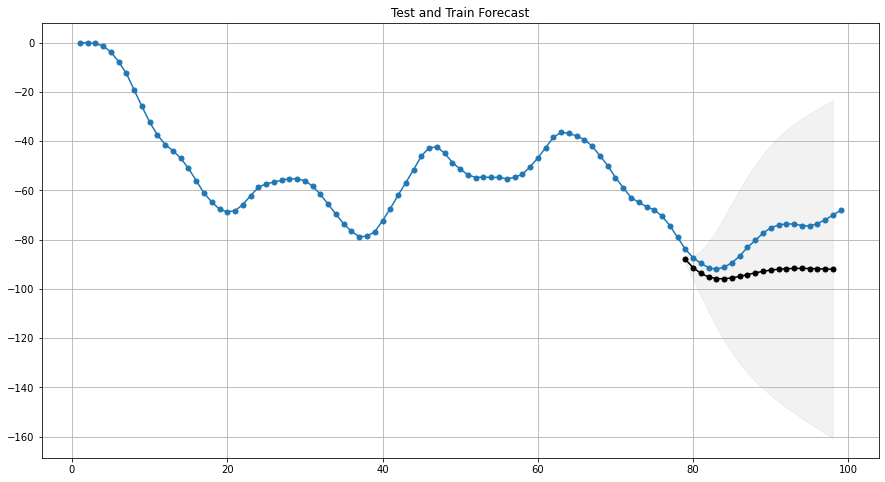

In [16]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(Model_Time, array_data, marker = "o", markersize = 5)
plt.plot(x_test, test_predict, marker = "o", markersize = 5, color="k")

ax.fill_between(x_test,cf[0], cf[1], color='black',alpha=0.05)
plt.grid()
plt.title("Test and Train Forecast")

plt.savefig("Test and Train Forecast.jpg", dpi = 150)
plt.show()

# forecasting 

In [17]:
prediction, confint1 = ARIMA_1.predict(n_periods=TEST_SIZE, return_conf_int=True)
cf1 = pd.DataFrame(confint1)
x_per = np.arange(100,120)
prediction.shape, confint1.shape, x_per.shape

((20,), (20, 2), (20,))

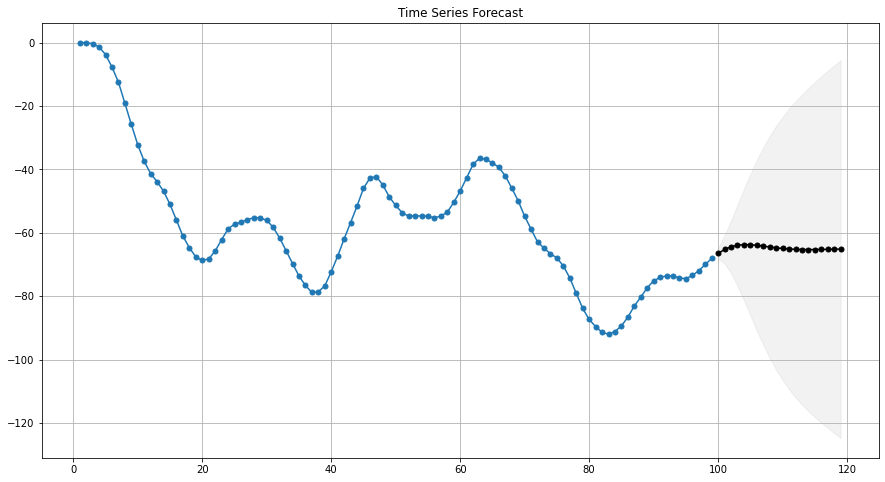

In [18]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(Model_Time, array_data, marker = "o", markersize = 5)
plt.plot(x_per, prediction, marker = "o", markersize = 5, color="k")

ax.fill_between(x_per,cf1[0], cf1[1], color='black',alpha=0.05)
plt.grid()
plt.title("Time Series Forecast")

plt.savefig("Time Series Forecast.jpg", dpi = 150)
plt.show()